In [9]:
import pandas as pd 

# reading csv file 
data = pd.read_csv('weather_numeric.csv') 

# shape of dataset 
print("Shape:", data.shape) 

# column names 
print("\nFeatures:", data.columns) 


Shape: (14, 5)

Features: Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')


In [10]:
# storing the feature matrix (x) and response vector (y) 
x_train = data[data.columns[:-1]] 
y_train = data[data.columns[-1]] 

# printing rows of feature matrix 
print("\nFeature matrix:\n", x_train) 

# printing values of response vector 
print("\nResponse vector:\n", y_train)






Feature matrix:
      Outlook  Temperature  Humidity  Windy
0      sunny           85        85  False
1      sunny           80        90   True
2   overcast           83        86  False
3      rainy           70        96  False
4      rainy           68        80  False
5      rainy           65        70   True
6   overcast           64        65   True
7      sunny           72        95  False
8      sunny           69        70  False
9      rainy           75        80  False
10     sunny           75        70   True
11  overcast           72        90   True
12  overcast           81        75  False
13     rainy           71        91   True

Response vector:
 0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object


In [13]:
#Encoding the strings to Numericals
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
#Adding new columns for the encoded values

x_train['Outlook_num']= le.fit_transform(x_train['Outlook'])

x_train['Windy_num']= le.fit_transform(x_train['Windy'])

print(x_train)

     Outlook  Temperature  Humidity  Windy  Outlook_num  Windy_num
0      sunny           85        85  False            2          0
1      sunny           80        90   True            2          1
2   overcast           83        86  False            0          0
3      rainy           70        96  False            1          0
4      rainy           68        80  False            1          0
5      rainy           65        70   True            1          1
6   overcast           64        65   True            0          1
7      sunny           72        95  False            2          0
8      sunny           69        70  False            2          0
9      rainy           75        80  False            1          0
10     sunny           75        70   True            2          1
11  overcast           72        90   True            0          1
12  overcast           81        75  False            0          0
13     rainy           71        91   True            1       

In [9]:
#Dropping the collumns with string values
x_train = x_train.drop(['Outlook','Windy'],axis='columns')
print(x_train)

    Temperature  Humidity  Outlook_num  Windy_num
0            85        85            2          0
1            80        90            2          1
2            83        86            0          0
3            70        96            1          0
4            68        80            1          0
5            65        70            1          1
6            64        65            0          1
7            72        95            2          0
8            69        70            2          0
9            75        80            1          0
10           75        70            2          1
11           72        90            0          1
12           81        75            0          0
13           71        91            1          1


In [14]:
# training the model on training set 

from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(x_train, y_train) 


ValueError: could not convert string to float: 'sunny'

In [7]:
# making predictions on the testing set 
y_pred = knn.predict(x_train) 

print("Classes prédites pour les exemples de test")
print(y_pred)

print("Classes réelles des exemples de test")
print(y_train)



ValueError: could not convert string to float: 'sunny'

In [12]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
efficacite = metrics.accuracy_score(y_train, y_pred)
erreur = 1-efficacite
print("efficacité du modèle sur les exemples de test : ", efficacite , " , soit ", efficacite*100 , ' %') 
print("erreur du modèle sur les exemples de test : ", erreur, " , soit ", erreur*100 , ' %') 



efficacité du modèle sur les exemples de test :  0.7142857142857143  , soit  71.42857142857143  %
erreur du modèle sur les exemples de test :  0.2857142857142857  , soit  28.57142857142857  %


In [13]:
conf = metrics.confusion_matrix(y_train, y_pred)
print('matrice de confusion avec les exemples de test')
print(conf)

matrice de confusion avec les exemples de test
[[3 2]
 [2 7]]


matrice de confusion avec les exemples de test


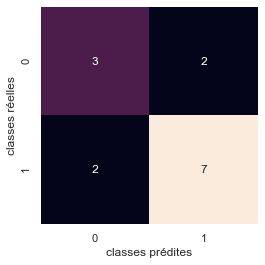

In [14]:
print('matrice de confusion avec les exemples de test')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.heatmap(conf, square=True, annot=True, cbar=False)
plt.xlabel('classes prédites')
plt.ylabel('classes réelles');

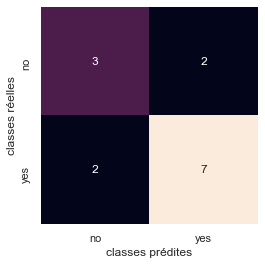

In [15]:
import seaborn as sns
sns.set()
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(['no', 'yes'])
            , yticklabels=list(['no', 'yes']))
plt.xlabel('classes prédites')
plt.ylabel('classes réelles');

In [16]:
result = metrics.classification_report(y_train, y_pred)
print("Classification Report:",)
print (result)

Classification Report:
              precision    recall  f1-score   support

          no       0.60      0.60      0.60         5
         yes       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



In [17]:
# making prediction for a new example
sample = [ [60, 65, 2, 1 ] ] 
preds = knn.predict(sample) 
print('For the new example ', sample)
print("The Predictions is :", preds)

For the new example  [[60, 65, 2, 1]]
The Predictions is : ['yes']


In [18]:
# making prediction for two new examples
sample = [[63, 68, 1, 0], [80, 73, 2, 1]] 
preds = knn.predict(sample)
print('For the new examples ', sample)
print("The Predictions are :", preds)

For the new examples  [[63, 68, 1, 0], [80, 73, 2, 1]]
The Predictions are : ['yes' 'yes']
